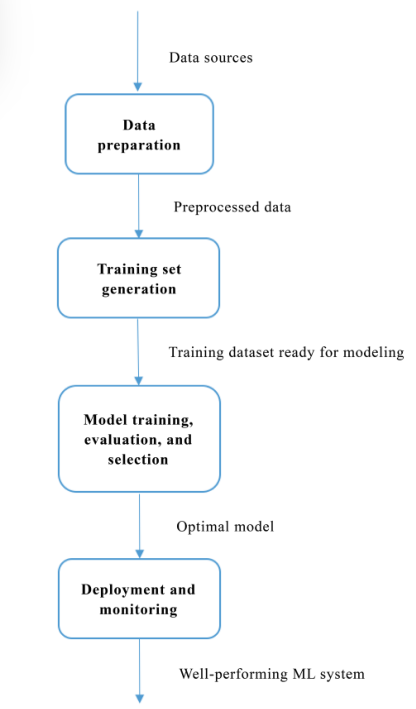

# Best practices in the data preparation stage

### Best practice 1 – Completely understanding the project goal

Before you collect any data, make sure you **completely understand the project's main goal and business problem.**

**Why is this important?**
*   It tells you exactly **what data to collect** and what to ignore.
*   It ensures you have the right **expertise** for the project.

**Examples:**
*   **Goal: Predict stock prices.**
    *   **Right Data:** Past performance of *that specific stock*.
    *   **Wrong Data:** Data on an unrelated European stock.

*   **Goal: Improve ad clicks.**
    *   **Right Data:** Information on *who* clicked (or didn't click) *which* ad and *where*.
    *   **Wrong Data:** Just counting how many ads were shown.

**In short: A clear goal prevents you from wasting time on the wrong data.**

### Best practice 2 – Collecting all fields that are relevant

When gathering data, don't just pick a few fields you think are important. **Collect all available fields that are even remotely related** to your project goal.

**Why is this important?**
*   It's very difficult to know in advance which data fields will be the most useful for prediction.
*   **Re-collecting data is often time-consuming, expensive, or sometimes impossible** if the original source is gone.

**Examples:**
*   **Stock Prediction:** They collected Open, High, Low, and Volume data, not just the closing price. This was easy to get and gave them more options.
*   **Web Scraping:** If scraping news articles, save all information (like text, author, hyperlinks, etc.). If you later realize you need the hyperlinks but didn't save them, the articles might already be deleted.

**In short: It's better to have data you don't use than to need data you didn't collect.** After collection, the next step is to check the data's quality.

### Best practice 3 – Maintaining the consistency and normalization of field values

Make sure the values in your data are **consistent and formatted the same way**.

**Why is this important?**
*   If the same thing is written in different ways (e.g., "US", "U.S.A", "America"), a computer will treat them as completely different items, which will break your analysis.

**What to do:**
*   **Standardize Categories:** Choose one standard term and replace all variations with it (e.g., replace "Male", "M", and "MALE" all with "M").
*   **Fix Formats:** Ensure all values in a column follow the same format.
    *   **Example 1 (Age):** The values `21`, `35`, `1990`, `1978` are inconsistent. You must convert birth years like `1990` into an age.
    *   **Example 2 (Rating):** Convert written numbers like "one", "two" into numerals like `1`, `2`.

**In short: Clean up your data so that everything that means the same thing *looks* the same thing.** This prevents errors and ensures your algorithms work correctly.

### Best practice 4 – Dealing with missing data

Real-world data is rarely perfect and often has missing values (like blanks, "unknown", or placeholders like `-1`). These missing values can confuse a machine learning model and hurt its performance.

You have three main options to deal with them:

**1. Delete the Rows**
*   **What:** Remove any row (sample) that has a missing value.
*   **Pro:** Simple.
*   **Con:** You lose data, which is bad if your dataset is small.

**2. Delete the Columns**
*   **What:** Remove an entire column (field) if it has any missing values.
*   **Pro:** Simple.
*   **Con:** You lose a whole feature, which might have been important.

**3. Fill in the Blanks (Imputation)**
*   **What:** Estimate and fill in the missing values.
*   **How:** Replace them with a common value from that column, like the **average** (for numbers) or the **most frequent** value (for categories).
*   **Pro:** You don't lose any data or features.
*   **Con:** The estimates might not be perfectly accurate.

**In short: Don't ignore missing data. Decide whether to remove the problem rows/columns or to make an educated guess to fill them in.** Imputation (filling in) is usually the preferred method because it preserves all your data.

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

data_origin = [[30, 100],
              [20, 50],
              [35, np.nan],
              [25, 80],
              [30, 70],
              [40, 60]]

In [14]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_mean_imp = imp_mean.fit_transform(data_origin)
print(data_mean_imp)

[[ 30. 100.]
 [ 20.  50.]
 [ 35.  72.]
 [ 25.  80.]
 [ 30.  70.]
 [ 40.  60.]]


In [15]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_origin)
data_median_imp = imp_median.transform(data_origin)
print(data_median_imp)

[[ 30. 100.]
 [ 20.  50.]
 [ 35.  70.]
 [ 25.  80.]
 [ 30.  70.]
 [ 40.  60.]]


When new samples come in, the missing values (in any attribute) can be imputed using the trained
transformer, for example, with the mean value, as shown here:

In [16]:
new = [[20, np.nan],
[30, np.nan],
[np.nan, 70],
[np.nan, np.nan]]
new_mean_imp = imp_mean.transform(new)
print(new_mean_imp)

[[20. 72.]
 [30. 72.]
 [30. 70.]
 [30. 72.]]


More Real Example

1. First, we load the diabetes dataset, as shown here:

In [17]:
from sklearn import datasets
dataset = datasets.load_diabetes()

X_full, y =  dataset.data, dataset.target


2. Simulate a corrupted dataset by adding 25% missing values:

In [18]:
m, n = X_full.shape

m_missing = int(m * 0.25)
print(m, m_missing)

442 110


3. Randomly select the m_missing samples, as follows:

In [19]:
np.random.seed(42)
missing_samples = np.random.randint(0, m, m_missing)
print(missing_samples)

[102 435 348 270 106  71 188  20 102 121 214 330  87 372  99 359 151 130
 149 308 257 343 413 293 385 191 276 160 313  21 252 235 344  48  58 169
 187 270 189 174  50 363  54 243 319 130 306 134  20 328 166 273 387  88
 315  13 241 264 345  52 385 339  91 366 427 263 430  34 205  80 419  49
 359 387   1 389  53 105 259 309 190 401 217  43 161 201 269 350 303 270
 214 251 189 295 212 207 236 337 366  52 279 409 216 251 187 379  40 156
  14 300]


4. For each missing sample, randomly select 1 out of n features:

In [20]:
missing_features = np.random.randint(low=0, high=n, size=m_missing)


5. Represent missing values with nan, as shown here:

In [21]:
X_missing = X_full.copy()

X_missing[np.where(missing_samples)[0], missing_features] = np.nan

6. Then, we deal with this corrupted dataset by discarding the samples containing a missing value:

In [22]:
X_rm_missing = X_missing[~missing_samples, :]
y_rm_missing = y[~missing_samples]

7. Measure the effects of using this strategy by estimating the averaged regression score R
2, with
a regression forest model in a cross-validation manner. Estimate R
2 on the dataset with the
missing samples removed, as follows:

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

regressor = RandomForestRegressor(random_state=42 ,
                                  max_depth=10 ,
                                  n_estimators=100)

score_rm_missing = cross_val_score(regressor,
                                   X_rm_missing,
                                   y_rm_missing).mean()

print(f'Score with the data set with missing samples removed: {score_rm_missing:.2f}')

Score with the data set with missing samples removed: 0.58


8. Now we approach the corrupted dataset differently by imputing missing values with the mean,
as shown here:

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_mean_imp = imp_mean.fit_transform(X_missing)


9. Similarly, measure the effects of using this strategy by estimating the averaged R
2, as follows:

In [25]:
regressor = RandomForestRegressor(random_state=42,
                                  max_depth=10,
                                  n_estimators=100)

score_mean_imp = cross_val_score(regressor, X_mean_imp, y).mean()

print(f'Score with the data set with missing values replaced by mean:{score_mean_imp:.2f}')

Score with the data set with missing values replaced by mean:0.43


10. An imputation strategy works better than discarding in this case. So, how far is the imputed
dataset from the original full one? We can check it again by estimating the averaged regression
score on the original dataset, as follows:

In [26]:
regressor = RandomForestRegressor(random_state=42,
                                  max_depth=10,
                                  n_estimators=500)

score_full = cross_val_score(regressor, X_full, y).mean()

print(f'Score with the full data set: {score_full:.2f}')

Score with the full data set: 0.42


It turns out that little information is compromised in the imputed dataset.


However, there is no guarantee that an imputation strategy always works better, and sometimes, drop-
ping samples with missing values can be more effective. Hence, it is a great practice to compare the
performance of different strategies via cross-validation, as we have done previously



### Best practice 5 – Storing large-scale data

When your dataset is too large for a single computer, you need a strategy to store and manage it.

You have two main approaches:

**1. Scale Up (Vertical Scaling)**
*   **What:** Add more power (like bigger hard drives) to your existing single machine.
*   **Good for:** Situations where you need very fast access and your data size is predictable.

**2. Scale Out (Horizontal Scaling)**
*   **What:** Distribute your data across many connected machines (a cluster).
*   **How:** Use technologies like **Hadoop (HDFS)** or **Spark**, or use cloud services like **Amazon S3**, **Google Cloud Storage**, or **Microsoft Azure Storage**.
*   **Good for:** Truly massive, ever-growing datasets. This is the most common modern approach.

**Key Considerations for Large-Scale Storage:**
*   **Partitioning:** Split data into smaller chunks to spread the workload and allow for faster parallel processing.
*   **Compression:** Shrink the data to save space and speed up transfer times.
*   **Replication:** Copy data to multiple locations to prevent loss if one machine fails.
*   **Security:** Control who can access the data to keep it safe.

**In short: For large datasets, don't rely on a single machine. Use a distributed system (Scale Out) in the cloud and remember to partition, compress, and secure your data.**

# Best practices in the training set generation stage

### Best practice 6 – Identifying categorical features with numerical values

Sometimes a feature uses numbers, but those numbers are just **labels or codes**, not true quantities. It's crucial to identify these and treat them as categories, not numbers.

**How to tell the difference:**
*   **It's a Numerical Feature** if the numbers have a **mathematical or ranking meaning**.
    *   **Example:** A product rating from `1` to `5`. The number `4` is "better" than `2`. You can calculate an average rating.
*   **It's a Categorical Feature** if the numbers are just **labels or names** without mathematical meaning.
    *   **Example:** `1` for January, `2` for February... `12` for December. The number `12` isn't "greater than" `1` in a meaningful way; it's just a code for a month. `0` for False and `1` for True is another common example.

**In short: Ask yourself, "Do these numbers represent a quantity or a rank?" If no, it's a category and should be treated as such by your model.**

### Best practice 7 – Deciding whether to encode categorical features


Once you've identified a categorical feature, you must decide whether to convert it into numbers (a process called **encoding**). This decision depends entirely on the machine learning algorithm you plan to use.

**The Rule of Thumb:**
*   **Do NOT Encode** for algorithms like **Naïve Bayes** and **Tree-Based models** (e.g., Decision Trees, Random Forests). These algorithms can work directly with category labels.
*   **You MUST Encode** for most other algorithms (like regression, support vector machines, or neural networks). These algorithms require all input to be numerical.

**Key Takeaway:**
Your data preparation steps (like encoding) and your choice of model are **deeply connected**. You should not prepare your data in isolation; always consider what your chosen model requires.

**In short: Check your model's requirements first. Some models need categories to be converted to numbers, while others do not.** Plan your data preparation and model selection together.

### Best practice 8 – Deciding whether to select features and, if so, how to do so

Feature selection is the process of choosing the most important variables and removing irrelevant or redundant ones.

**Why is it beneficial?**
*   **Faster Training:** Models train much quicker with fewer features.
*   **Reduces Overfitting:** Helps the model learn general patterns instead of memorizing noise, making it more reliable on new data.
*   **Can Improve Performance:** Often leads to better accuracy by helping the model focus on what truly matters.

**Important Caveat:**
Feature selection does *not* automatically guarantee a better model. Its effectiveness needs to be tested.

**How to decide?**
The best practice is to **test both ways**. Use cross-validation to compare the performance of your model **with and without** feature selection to see which approach works best for your specific project.

**In short: Try using feature selection to make your model faster and simpler, but always validate that it actually helps rather than hurts your results.**

1. First, we load the handwritten digits dataset from scikit-learn, as follows:

In [27]:
from sklearn.datasets import load_digits

dataset  = load_digits()

X,y = dataset.data , dataset.target
print(X.shape)

(1797, 64)


2. Next, estimate the accuracy of the original dataset, which is 64-dimensional, as detailed here

In [28]:
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

classifier = SVC(gamma=0.005, random_state=42)
score = cross_val_score(classifier, X, y).mean()
print(f'Score with the original data set: {score:.2f}')

Score with the original data set: 0.90


3. Then, conduct feature selection based on random forest and sort the features based on their
importance scores

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       criterion='gini',
                                       n_jobs=-1,
                                       random_state=42)
random_forest.fit(X, y)

feature_sorted = np.argsort(random_forest.feature_importances_)

4. Now select a different number of top features to construct a new dataset, and estimate the
accuracy on each dataset, as follows:

In [30]:
K = [10, 15, 25, 35, 45]
for k in K:
    top_K_features = feature_sorted[-k:]
    X_k_selected = X[:, top_K_features]
    # Estimate accuracy on the data set with k
    # selected features
    classifier = SVC(gamma=0.005)
    score_k_features = cross_val_score(classifier, X_k_selected, y).mean()
    print(f'Score with the dataset of top {k} features: {score_k_features:.2f}')

Score with the dataset of top 10 features: 0.86
Score with the dataset of top 15 features: 0.92
Score with the dataset of top 25 features: 0.95
Score with the dataset of top 35 features: 0.93
Score with the dataset of top 45 features: 0.90


If we use the top 25 features selected by random forest, the SVM classification performance can in-
crease from 0.9 to 0.95.





### Best practice 9 – Deciding whether to reduce dimensionality and, if so, how to do so


While both techniques aim to simplify your data, they work in fundamentally different ways:

*   **Feature Selection:** Chooses a subset of the **most important original features** from your dataset (e.g., selecting "age" and "income" but discarding "name").
*   **Dimensionality Reduction:** Creates **new, smaller set of features** by combining and transforming the original ones (e.g., using PCA to merge correlated features like "height in inches" and "height in centimeters" into a new, single component).

**Shared Advantages:**
Both methods offer the same key benefits:
1.  **Faster Training:** Models train more quickly with fewer, less redundant inputs.
2.  **Reduces Overfitting:** Helps the model generalize better to new data.
3.  **May Improve Performance:** Can lead to more accurate models by eliminating noise.

**Crucial Note:**
There is **no guarantee** that either method will automatically improve your model's accuracy. The only way to know is to **test it empirically** (e.g., using cross-validation) and compare the results against using all the original features.

**In short: Use these techniques to build simpler, more efficient models, but always validate their impact on performance to ensure they are actually helping.**


In [31]:
from sklearn.decomposition import PCA
# Keep different number of top components

N = [10, 15, 25, 35, 45]

for n in N :

  pca = PCA(n_components=n)
  X_n_kept = pca.fit_transform(X)
  # Estimate accuracy on the data set with top n components

  classifier = SVC(gamma=0.005)

  score_n_components = cross_val_score(classifier,
                                       X_n_kept, y).mean()
  print(f'Score with the dataset of top {n} components:{score_n_components:.2f}')

Score with the dataset of top 10 components:0.94
Score with the dataset of top 15 components:0.95
Score with the dataset of top 25 components:0.93
Score with the dataset of top 35 components:0.91
Score with the dataset of top 45 components:0.90


If we use the top 15 features generated by PCA, the SVM classification performance can increase from
0.9 to 0.95

### Best practice 10 – Deciding whether to rescale features



Feature scaling (like standardization) ensures all your numerical features are on a similar scale (e.g., between 0 and 1 or with a mean of 0).

**When is it REQUIRED?**
Scale features for algorithms that use **distance, gradients, or similarity** in their calculations, such as:
*   **SVM (SVC/SVR)**
*   **k-Nearest Neighbors (KNN)**
*   **k-Means Clustering**
*   **Neural Networks**
*   **Any algorithm using Stochastic Gradient Descent (SGD)** (like linear/logistic regression)

**When is it NOT needed?**
Algorithms that are **not sensitive to feature scale** include:
*   **Tree-Based algorithms** (Decision Trees, Random Forest)
*   **Naïve Bayes**

**In short: If your model relies on distance or gradients, you must scale your features. For tree-based models, you can often skip this step.** Always check your algorithm's requirements.

### Best practice 11 – Performing feature engineering with domain
expertise
The most effective way to improve your model is to use your **business or domain expertise** to create new, insightful features from your existing data.

**How it works:** Your experience tells you what factors are truly important for prediction. You can then design features that capture those factors.

**General Tips & Examples:**
*   **Time-Based Features:** From a date/time stamp, extract powerful signals like:
    *   Time of day (e.g., "afternoon")
    *   Day of the week (e.g., "Tuesday")
    *   Month (e.g., "September")
*   **Aggregate Historical Data:** Summarize past behavior to predict future actions.
    *   **Retail Example:** "Number of store visits in the last 3 months" or "average weekly purchases last year" are strong indicators of future customer behavior.

**In short: Don't just use the raw data. Think like an expert and create new features that you know are important for making the decision you're trying to predict.** This is often the key to a highly accurate model.

### Best practice 12 – Performing feature engineering without domain expertise


Even if you're not an expert in the field, you can still create powerful new features using these standard techniques:

**1. Binarization**
*   **What:** Convert a number into a simple yes/no (1 or 0) flag based on a threshold.
*   **Example:** Create a feature `is_frequent_visitor: 1` if `visits_per_week >= 3`, otherwise `0`.

**2. Discretization**
*   **What:** Convert a number into a category or range.
*   **Example:** Turn a precise `age` into an `age_group` like "18-24", "25-34", etc.

**3. Interaction**
*   **What:** Combine two existing features to create a new one.
*   **Example:**
    *   For numbers: `products_purchased_per_visit = total_products / total_visits`
    *   For categories: Combine `occupation=engineer` and `interest=sports` into a new category `engineer_who_likes_sports`.

**4. Polynomial Transformation**
*   **What:** Use math to automatically create new features by multiplying existing ones together (e.g., `a²`, `a * b`, `b²`). This helps models discover complex relationships.

**In short: You don't always need deep expertise. Using these standard techniques to create new input features from your existing data can significantly boost your model's performance.**

**Binarization and discretization**

In [32]:
from sklearn.preprocessing import Binarizer

X = [[4], [1], [3], [0]]
binarizer =  Binarizer(threshold=2.9)
X_new = binarizer.fit_transform(X)

print(X_new)

[[1]
 [0]
 [1]
 [0]]


**Polynomial transformation**

In [33]:
from sklearn.preprocessing import PolynomialFeatures
X = [[2, 4],
  [1, 3],
  [3, 2],
  [0, 3]]

poly = PolynomialFeatures(degree=2)

X_new = poly.fit_transform(X)
print(X_new)

[[ 1.  2.  4.  4.  8. 16.]
 [ 1.  1.  3.  1.  3.  9.]
 [ 1.  3.  2.  9.  6.  4.]
 [ 1.  0.  3.  0.  0.  9.]]


### Best practice 13 – Documenting how each feature is generated



Always **keep clear notes** on how you created each new feature.

**Why is this critical?**
*   Machine learning is an **iterative process**. You will often need to go back and change your features after testing your model.
*   Without documentation, you can easily **forget how a feature was built**, making it impossible to reproduce or modify it correctly.
*   It allows you to systematically **remove features that don't work** and **build upon ones that do**.

**In short: Treat your feature engineering like a recipe. Write down the ingredients and steps for each feature so you can recreate, tweak, or remove them later.** This saves immense time and prevents future confusion.

### Best practice 14 – Extracting features from text data

You have two main approaches to turn text into numbers that a model can understand:

#### **1. Traditional: Bag-of-Words (TF & TF-IDF)**
*   **What it does:** Treats text as a "bag" of words, ignoring order and grammar. It counts how often each word appears.
    *   **TF (Term Frequency):** Just the raw count of a word.
    *   **TF-IDF (Term Frequency-Inverse Document Frequency):** Adjusts the count by how unique a word is. Common words (like "the", "and") get a low score; rare, important words get a high score.
*   **Pros:** Simple, effective for many tasks like basic text classification and topic modeling.
*   **Cons:** Creates very large, sparse datasets. Loses all meaning of word order and context.

#### **2. Modern: Word Embeddings (like Word2Vec)**
*   **What it does:** Represents each word as a dense vector (a list of numbers) in a way that words with similar meanings are close together in this numerical space.
*   **How to get them:**
    *   **Pre-trained Models:** Download existing models (like Word2Vec, GloVe, BERT) trained on massive text corpora (e.g., all of Wikipedia). This is the fastest and most common approach.
    *   **Train Your Own:** Use a library like `gensim` to train a model on your specific dataset if your domain has unique vocabulary.
    *   **Learn During Training:** Use an **Embedding Layer** in a neural network (like in PyTorch or TensorFlow) to let the model learn the best word representations for its specific task.
*   **Pros:**
    *   Captures meaning, context, and semantic relationships (e.g., "king" - "man" + "woman" ≈ "queen").
    *   Creates much smaller, denser, and more powerful feature sets.
*   **Cons:** More complex to implement than TF-IDF.

---

### **Which One Should You Use?**

| Task / Consideration          | **Use TF-IDF**                                          | **Use Word Embeddings**                                  |
| ----------------------------- | ------------------------------------------------------- | -------------------------------------------------------- |
| **Task Type**                 | Simple classification, topic modeling                   | Complex tasks: translation, summarization, Q&A, sentiment |
| **Context Importance**        | Context and word order are not critical                 | Meaning and context are crucial                          |
| **Computational Resources**   | Limited; need a simple, fast solution                   | More resources available; can handle complex models      |
| **Domain-Specific Language**  | Standard language                                       | Unique vocabulary (best to train your own embeddings)    |

**In short: Start with TF-IDF for simpler, well-defined tasks. Use pre-trained word embeddings for more complex problems where understanding meaning and context is key.** For cutting-edge performance on complex NLP tasks, modern embeddings (like from BERT) are the undisputed best practice.

**Word2Vec embedding**

In [1]:
!pip install gensim

In [3]:
from gensim.models import Word2Vec

sentences = [
["i", "love", "machine", "learning", "by", "example"],
["machine", "learning", "and", "deep", "learning", "are", "fascinating"],
["word", "embedding", "is", "essential", "for", "many", "nlp", "tasks"],
["word2vec", "produces", "word", "embeddings"]
]

In practice, you will need to format the sentences in plain text into a list of word lists just like the sentences object.

We then create a Word2Vec model with various parameters, such as vector_size (embedding di-
mension), window (context window size), min_count (minimum frequency of words), and sg (training
algorithm – 0 for CBOW, 1 for Skip-gram):

In [4]:
model = Word2Vec(sentences=sentences,
                 vector_size=100,
                 window=5,
                 min_count=1,
                 sg=0)

After training, we access word vectors using the model’s wv property. Here, we display the embedding
vector for the word machine:

In [5]:
vector = model.wv["machine"]
print("Vector for 'machine':", vector)

Vector for 'machine': [ 9.2815855e-05  3.0779743e-03 -6.8117767e-03 -1.3753572e-03
  7.6693585e-03  7.3465472e-03 -3.6724545e-03  2.6435424e-03
 -8.3174659e-03  6.2051434e-03 -4.6373457e-03 -3.1652437e-03
  9.3113342e-03  8.7273103e-04  7.4911476e-03 -6.0739564e-03
  5.1591368e-03  9.9220201e-03 -8.4587047e-03 -5.1362212e-03
 -7.0644980e-03 -4.8613679e-03 -3.7768795e-03 -8.5355258e-03
  7.9550967e-03 -4.8430962e-03  8.4243221e-03  5.2609886e-03
 -6.5501807e-03  3.9575580e-03  5.4708594e-03 -7.4282014e-03
 -7.4055856e-03 -2.4756377e-03 -8.6252270e-03 -1.5801827e-03
 -4.0236043e-04  3.3001360e-03  1.4415972e-03 -8.8241365e-04
 -5.5940133e-03  1.7302597e-03 -8.9826871e-04  6.7939684e-03
  3.9741215e-03  4.5290575e-03  1.4341431e-03 -2.6994087e-03
 -4.3666936e-03 -1.0321270e-03  1.4369689e-03 -2.6467817e-03
 -7.0735654e-03 -7.8056543e-03 -9.1217076e-03 -5.9348154e-03
 -1.8470082e-03 -4.3242811e-03 -6.4605214e-03 -3.7180765e-03
  4.2892280e-03 -3.7388816e-03  8.3797537e-03  1.5337169e-03
 -

Keep in mind that this is a basic example. In practice, you might need to preprocess your data more
thoroughly, adjust hyperparameters, and train on a larger corpus for better embeddings.

**Embedding layers in custom neural networks**

In [6]:
import torch
import torch.nn as nn
input_data = torch.LongTensor([[1, 2, 3, 4], [5, 1, 6, 3]])
# Define the embedding layer
vocab_size = 10 # Total number of unique words
embedding_dim = 3 # Dimensionality of the embeddings
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

embedded_data = embedding_layer(input_data)
print("Embedded Data:\n", embedded_data)

Embedded Data:
 tensor([[[-0.0214, -0.6070,  0.7414],
         [-0.8401,  1.3259,  1.0506],
         [-0.0096, -1.0786,  2.2886],
         [-0.0773, -1.0297,  0.5753]],

        [[-1.1364,  0.9128,  1.5273],
         [-0.0214, -0.6070,  0.7414],
         [-1.3549, -0.3670,  0.3559],
         [-0.0096, -1.0786,  2.2886]]], grad_fn=<EmbeddingBackward0>)


# Best practices in the model training, evaluation, and selection stage

### Best practice 15 – Choosing the right algorithm(s) to start with

Don't try every algorithm at once. Use these guidelines to pick one to three to start with, based on your data and goals.

| Algorithm | Best For... | Key Things to Know |
| :--- | :--- | :--- |
| **Naïve Bayes** | **Small or Large datasets** where features are roughly independent. | • Very simple and **fast to train**.<br>• Can be a good **quick baseline**.<br>• Can have **high bias** (oversimplifies). |
| **Logistic Regression** | **The go-to starting point** for classification. Works well if the data is (or can be made) **linearly separable**. | • **Widely used** and versatile.<br>• Scalable to huge datasets.<br>• Use **regularization (L1/L2)** to prevent overfitting. |
| **SVM (Support Vector Machine)** | **High-dimensional data** (e.g., text with thousands of features) and **complex, non-linear** relationships (with RBF kernel). | • Can achieve **very high accuracy**.<br>• **Computationally expensive** on large datasets.<br>• Requires more tuning. |
| **Random Forest / Decision Tree** | **Ease of use.** Data where linear separation doesn't matter. **Categorical features** without encoding. | • **Easy to interpret** and explain.<br>• Handles non-linear data well.<br>• Less prone to overfitting than a single tree. |
| **Neural Networks** | **Complex, unstructured data** like images, audio, and advanced NLP (translation, summarization). **Very large datasets**. | • **Extremely powerful** but **complex** to set up and train.<br>• **Not a good starting point** for standard tabular data problems.<br>• The best choice for deep learning tasks. |

**How to Decide: Key Questions to Ask**
*   **Dataset Size?** Large → Logistic Regression, Naïve Bayes, Random Forest.
*   **Many Features?** (e.g., text) → SVM, Logistic Regression with regularization.
*   **Linear or Non-Linear?** Non-linear → SVM (with kernel), Random Forest.
*   **Need Simplicity & Speed?** → Naïve Bayes, Logistic Regression.
*   **Need interpretability?** → Decision Tree / Random Forest.
*   **Working with Images, Audio, or Language?** → **Neural Networks**.

**In short: For most standard problems, start with Logistic Regression or Random Forest. Use Naïve Bayes for a quick baseline or with text data. Use SVM for high-dimensional data. Reserve Neural Networks for complex, unstructured data like images and language where they truly shine.**

### Best practice 16 – Reducing overfitting


**Overfitting** happens when your model learns the training data *too well*, including its noise and random fluctuations, so it performs poorly on new, unseen data.

Here are the key ways to prevent it:

**1. Get More Data**
*   The simplest and most effective solution. More data helps the model learn general patterns instead of memorizing specifics.

**2. Simplify Your Model**
*   Use a less complex model: shallower trees, a simpler kernel in SVM, or fewer layers in a neural network.

**3. Use Cross-Validation**
*   Always use techniques like k-fold cross-validation to get a realistic estimate of your model's performance on unseen data.

**4. Apply Regularization**
*   Add penalty terms (like L1 or L2) to your model's loss function to discourage it from becoming too complex.

**5. Stop Training Early (Early Stopping)**
*   For iterative models (like neural networks), stop training as soon as performance on a validation set starts to get worse.

**6. Use Dropout (for Neural Networks)**
*   Randomly "turn off" a fraction of neurons during each training step. This prevents the network from relying too heavily on any single neuron.

**7. Do Feature Selection**
*   Remove irrelevant or redundant features. This prevents the model from learning noise.

**8. Use Ensemble Methods**
*   Combine predictions from multiple models (like in Random Forest) to average out their errors and create a more robust final model.

**In short: Fight overfitting by simplifying your model, validating it properly, and using techniques like regularization and dropout to keep it from memorizing the training data.**

### Best practice 17 – Diagnosing overfitting and underfitting

A **learning curve** is a graph that is the best tool to diagnose if your model is overfitting or underfitting. It plots the model's performance (e.g., accuracy) on both the **training set** and a **validation/test set** as the number of training examples increases.

Here’s how to read the curves:

#### **1. The Ideal Fit**
*   **What you see:** Both lines converge to a high level of performance. The performance on the validation set gets closer and closer to the performance on the training set as more data is added.
*   **What it means:** The model is learning the general patterns well and will generalize effectively to new data.

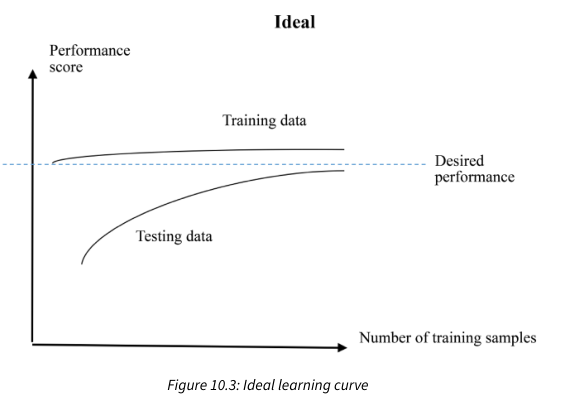


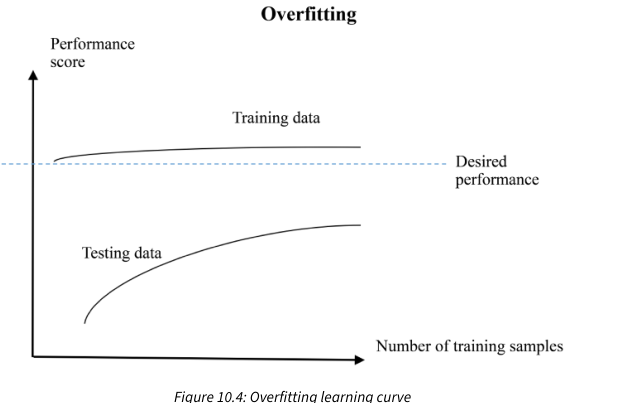


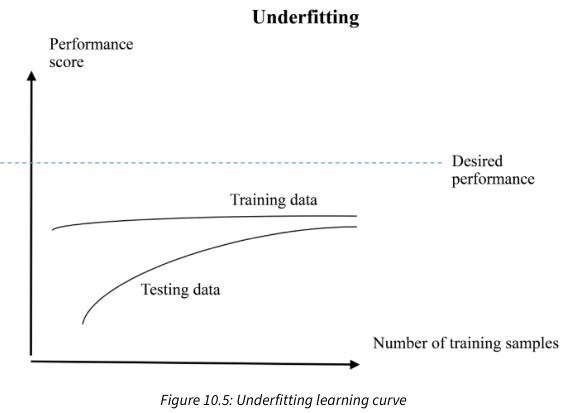


To generate the learning curve, you can utilize the learning_curve module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) from scikit-learn, and the plot_learning_curve function defined at https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html.

In [10]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


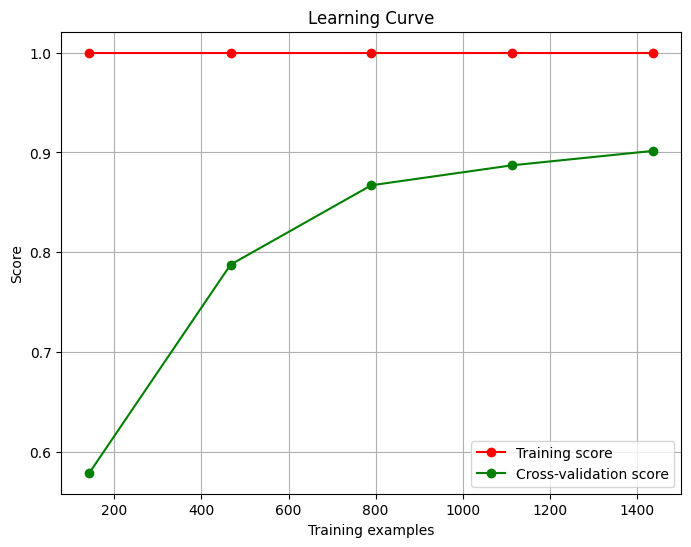

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# Load dataset
dataset = load_digits()
X, y = dataset.data, dataset.target

# Define classifier
svc = SVC(gamma=0.005, random_state=42)

# Plot learning curve
plot_learning_curve(svc, X, y, cv=5)


### Best practice 18 – Modeling on large-scale datasets


Working with huge datasets requires a different strategy to avoid long wait times and computational bottlenecks.

**Key Strategies:**

1.  **Start Small, Then Scale:**
    *   **Don't** use your entire dataset for initial experiments.
    *   **Do** take a random sample that fits on your machine. Use this sample to quickly test algorithms, tune parameters, and prototype. Only scale up to the full dataset once you're confident in your approach.

2.  **Choose Scalable Algorithms:**
    *   Prefer algorithms designed for big data, such as:
        *   **Logistic Regression** or **Linear SVM** with **SGD (Stochastic Gradient Descent)** optimization.
        *   Tree-based ensembles like **Random Forest** and **XGBoost** that can be parallelized.

3.  **Use the Right Tools & Infrastructure:**
    *   **Distributed Computing:** For data too big for one machine, use frameworks like **Apache Spark** or **Dask** to distribute the work across a cluster.
    *   **Cloud Services:** Leverage cloud platforms (AWS, GCP, Azure) that provide managed services for large-scale data processing and machine learning.

4.  **Optimize Technically:**
    *   **Feature Engineering:** Reduce the number of features to minimize complexity.
    *   **Incremental Learning:** For streaming data, use models that can learn and update themselves continuously without being retrained from scratch.
    *   **Save Your Models:** Training on large data takes time and resources. **Always save your trained model** so you can reload and use it later without retraining.

**In short: Don't try to boil the ocean. Prototype quickly on a small sample of your data. Once you have a working solution, use scalable algorithms and distributed computing frameworks to train your final model on the full dataset.**

### Best practice 19 – Saving, loading, and reusing models



#### Saving and restoring models using pickle

We start with using pickle. This can be illustrated via the diabetes example, where we standardize
the data and employ an SVR model, as follows:

In [36]:
from sklearn import datasets

dataset = datasets.load_diabetes()
X, y = dataset.data, dataset.target
num_new = 30 # the last 30 samples as new data set
X_train = X[:-num_new, :]
y_train = y[:-num_new]
X_new = X[-num_new:, :]
y_new = y[-num_new:]



In [38]:
# Preprocess the training data with scaling, as shown in the following commands:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Now save the established standardizer, the scaler object with pickle, as follows:

In [39]:
import pickle

pickle.dump(scaler, open("scaler.p", "wb" ))

This generates a scaler.p file.

Move on to training an SVR model on the scaled data, as follows:

In [40]:
X_scaled_train = scaler.transform(X_train)
from sklearn.svm import SVR
regressor = SVR(C=20)
regressor.fit(X_scaled_train, y_train)

SVR(C=20)

Save the trained regressor object with pickle, as follows:

In [41]:
pickle.dump(regressor, open("regressor.p", "wb"))

This generates a regressor.p file.

In the deployment stage, we first load the saved standardizer and the regressor object from the pre-
ceding two files, as follows:


In [42]:
my_scaler = pickle.load(open("scaler.p", "rb" ))
my_regressor = pickle.load(open("regressor.p", "rb"))

Then, we preprocess the new data using the standardizer and make a prediction with the regressor
object just loaded, as follows:

In [43]:
X_scaled_new = my_scaler.transform(X_new)
predictions = my_regressor.predict(X_scaled_new)

#### Saving and restoring models in TensorFlow

I will also demonstrate how to save and restore models in TensorFlow. As an example, we will train
a simple logistic regression model on the cancer dataset, save the trained model, and reload it in the
following steps

1. Import the necessary TensorFlow modules and load the cancer dataset from scikit-learn
and rescale the data:

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
X = scaler.fit_transform(X)
y = cancer_data.target

2. Build a simple logistic regression model using the Keras Sequential API, along with several
specified parameters:

In [45]:
learning_rate = 0.005
n_iter = 10
tf.random.set_seed(42)


model = keras.Sequential([
                keras.layers.Dense(units=1, activation='sigmoid')
      ])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate))


3. Train the TensorFlow model against the data:

In [46]:
model.fit(X, y, epochs=n_iter)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.9380
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4166
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2488
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1941
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1687
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1524
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1403
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1309
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1232
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1169


4. Display the model’s architecture:

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

We will see if we can retrieve the same model later.

5. Hopefully, the previous steps look familiar to you. If not, feel free to review our TensorFlow
implementation. Now we save the model to a path:

In [54]:
path = './model_tf.keras'

model.save(path)

After this, you will see that a folder called model_tf is created. The folder contains the trained
model’s architecture, weights, and training configuration.

6. Finally, we load the model from the previous path and display the loaded model’s path:

In [56]:
new_model = tf.keras.models.load_model(path)
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

#### Saving and restoring models in PyTorch

1. Convert the data torch tensors used for modeling:

In [57]:
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y.reshape(y.shape[0], 1))

2. Build a simple logistic regression model using the nn.sequential module, along with the loss
function and optimizer:

In [58]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(X.shape[1], 1),
                      nn.Sigmoid())

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

3. Reuse the train_step function we developed previously in Chapter 6, Predicting Stock Prices
with Artificial Neural Networks, and train the PyTorch model against the data for 10 iterations:

In [62]:
def train_step(model, X_train, y_train, loss_function, optimizer):
  pred_train = model(X_train)
  loss = loss_function(pred_train, y_train)
  model.zero_grad()
  loss.backward()
  optimizer.step()
  return loss.item()

for epoch in range(n_iter):
  loss = train_step(model, X_torch, y_torch, loss_function, optimizer)
  print(f"Epoch {epoch} - loss: {loss}")

Epoch 0 - loss: 0.37049761414527893
Epoch 1 - loss: 0.3597235083580017
Epoch 2 - loss: 0.3496290445327759
Epoch 3 - loss: 0.340160071849823
Epoch 4 - loss: 0.3312671184539795
Epoch 5 - loss: 0.3229050040245056
Epoch 6 - loss: 0.31503263115882874
Epoch 7 - loss: 0.30761241912841797
Epoch 8 - loss: 0.30061015486717224
Epoch 9 - loss: 0.2939947247505188


4. Display the model’s architecture:

In [63]:
print(model)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)


5. Hopefully, the previous steps look familiar to you. If not, feel free to review our PyTorch im-
plementation. Now we save the model to a path:

In [64]:
path = './model.pth '
torch.save(model, path)

After this, you will see that a folder called model.pth is created. The folder contains the entire
trained model’s architecture, weights, and training configuration.

6. Finally, we load the model from the previous path and display the loaded model’s path:

In [66]:
new_model = torch.load(path, weights_only=False)

print(new_model)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
)


### Best practice 20 – Monitoring model performance


A model's job isn't done after it's deployed. Its performance can decay over time due to changing real-world conditions (a concept called **model drift**). You must actively monitor it.

**How to Monitor Effectively:**

1.  **Track Key Metrics:** Continuously measure the same metrics you used for evaluation (e.g., Accuracy, F1-score, R², Mean Squared Error) on new, real-world data.

2.  **Compare to a Baseline:** Always compare your model's performance against a simple baseline (like historical averages or a rule-based system) to ensure it's still adding value.

3.  **Implement Logging and Alerts:**
    *   **Log Predictions and Truths:** Systematically record the model's predictions AND the actual outcomes (ground truth) when they become available.
    *   **Set Up Alerts:** Automate alerts to trigger if performance metrics fall below a predefined threshold. This is your early warning system for model decay.

4.  **Reuse Learning Curves:** The same learning curves used for diagnosis during training can be repurposed to monitor performance over time and detect emerging overfitting or underfitting on new data.

**In short: Treat your model like a vital sign. Constantly check its health by tracking its predictions against reality, and set up automated alerts to tell you the moment it starts to get sick (decay).** This allows you to retrain or update it before its performance becomes a business problem.

In [67]:
from sklearn.metrics import r2_score
print(f'Health check on the model, R^2: {r2_score(y_new,predictions):.3f}')

Health check on the model, R^2: 0.613


### Best practice 21 – Updating models regularly


A model's performance will decay over time as the real world changes. To keep it accurate and relevant, you need a plan for regular updates.

**Key Strategies for Updating:**

1.  **Monitor for Drift:** Continuously track performance metrics. A significant drop is your signal to update the model.

2.  **Choose Your Update Method:**
    *   **Online Updating (If Supported):** For models like those using SGD or Naïve Bayes, you can incrementally update them with new data as it arrives, without a full retrain.
    *   **Full Retraining:** For most other models, you need to periodically retrain them from scratch on a fresh dataset that includes recent data.

3.  **Put It on a Schedule:** Don't just wait for performance to crash. Establish a regular retraining schedule (e.g., monthly, quarterly) based on how quickly your data changes.

4.  **Use Version Control:** Treat your models like code. Keep versions of your models and datasets. This allows you to track changes, compare performance, and easily roll back to a previous model if a new update performs poorly.

5.  **Conduct Regular Audits:** Periodically step back and ask: Are the business goals the same? Are our evaluation metrics still the right ones? Does the model still make sense?

**In short: Model maintenance is a cycle, not a one-time event. Proactively schedule updates, use the right update method for your algorithm, and always keep versions to manage the process effectively.** This ensures your model remains a valuable asset.